<a href="https://colab.research.google.com/github/PreethamThinagaraj/CE888/blob/main/Project/CE888_Project1_2004054.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
  #Mounting to the google drive where the data is uploaded
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
import os
import cv2
import random
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import PIL
import albumentations as A

In [5]:
path_fire = '/content/Training/Fire'
fire_files = os.listdir(path_fire)
path_No_fire = '/content/Training/No_Fire'
No_fire_files = os.listdir(path_No_fire)

In [6]:
lst_fire_img = [ "/content/Training/Fire/" + item for i,item in enumerate(fire_files)]
lst_non_fire_img=[ "/content/Training/No_Fire/" + item for i,item in enumerate(No_fire_files)]

In [7]:
print('Number of images with fire : {}'.format(len(lst_fire_img)))
print('Number of images with No_fire : {}'.format(len(lst_non_fire_img)))

Number of images with fire : 25018
Number of images with No_fire : 14357


**Class Weights**

In [8]:
print("Weight of fire class : {}" .format(len(lst_fire_img)/(len(lst_fire_img)+len(lst_non_fire_img))))

Weight of fire class : 0.6353777777777778


In [9]:
print("Weight of NO fire class : {}" .format(len(lst_non_fire_img)/(len(lst_fire_img)+len(lst_non_fire_img))))

Weight of NO fire class : 0.36462222222222224


**Random images from the dataset being plotted**

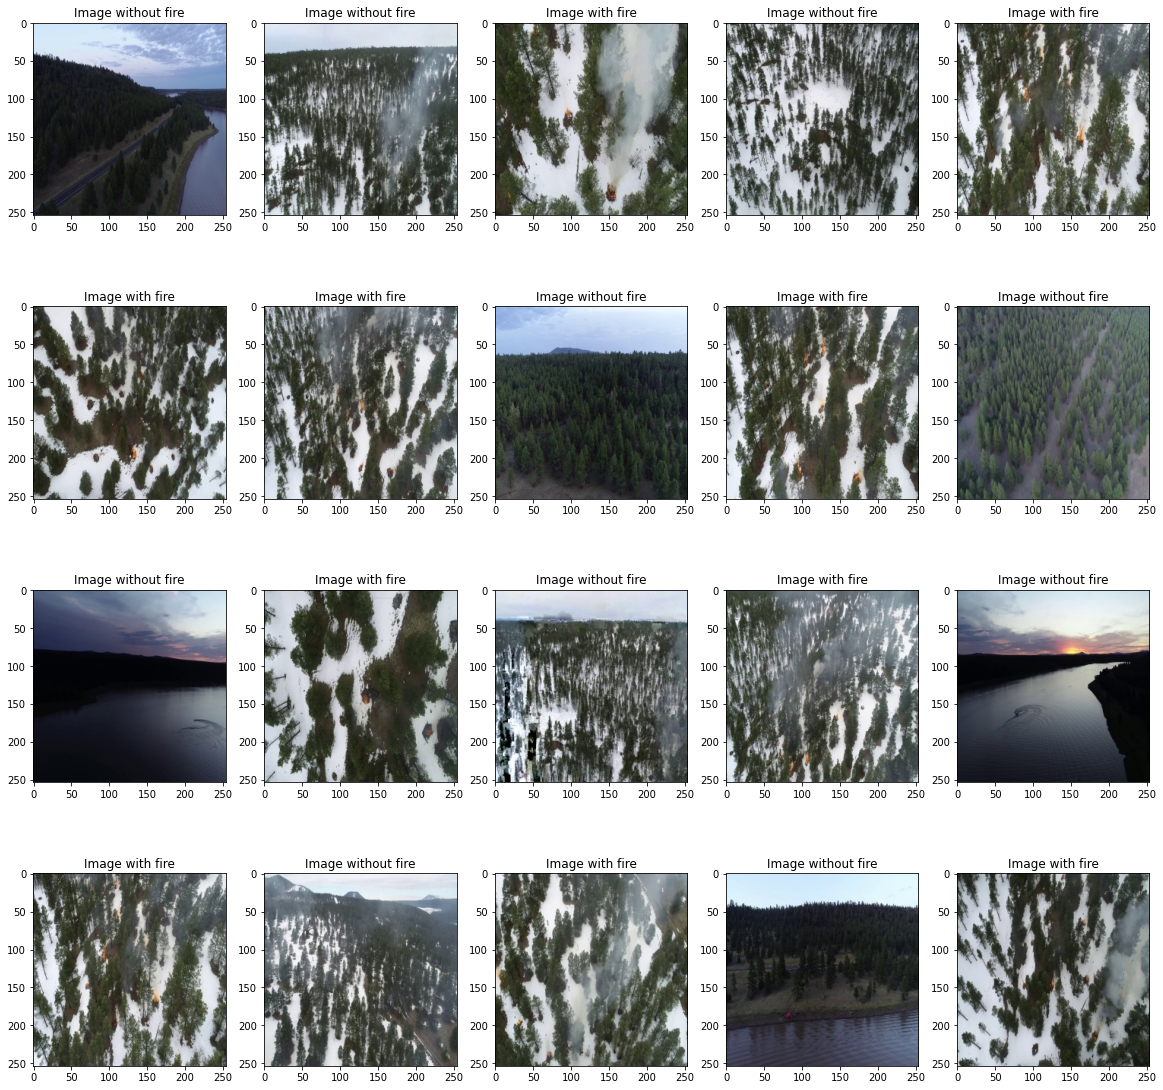

In [10]:
lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)

plt.figure(figsize = (20,20))

for i in range(len(lst_images_random)):
    
    plt.subplot(4,5,i+1)


    if "No_Fire" in lst_images_random[i]:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title('Image without fire')

    else:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")



plt.show()

**Creating a dataframe to show class imbalance**

In [11]:
lst_fire = []
for x in lst_fire_img:
  lst_fire.append([x,1])
lst_nn_fire = []
for x in lst_non_fire_img:
  lst_nn_fire.append([x,0])
lst_complete = lst_fire + lst_nn_fire
random.shuffle(lst_complete)

In [12]:
pd.set_option('display.max_colwidth',1000)

In [13]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,/content/Training/No_Fire/lake_resized_lake_frame9551.jpg,0
1,/content/Training/Fire/resized_frame1841.jpg,1
2,/content/Training/No_Fire/lake_resized_lake_frame3837.jpg,0
3,/content/Training/Fire/resized_frame9796.jpg,1
4,/content/Training/Fire/resized_frame8012.jpg,1
5,/content/Training/Fire/resized_frame857.jpg,1
6,/content/Training/No_Fire/lake_resized_lake_frame6463.jpg,0
7,/content/Training/No_Fire/lake_resized_lake_frame2227.jpg,0
8,/content/Training/Fire/resized_frame22378.jpg,1
9,/content/Training/Fire/resized_frame27523.jpg,1


In [14]:
df.shape

(39375, 2)

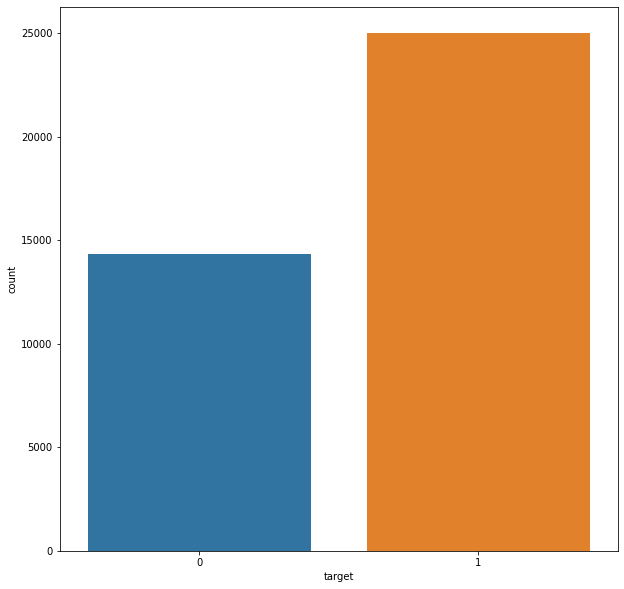

In [15]:
plt.figure(figsize = (10,10))


sns.countplot(x = "target",data = df)

plt.show()


**Considering a random image to understand the features of the image**

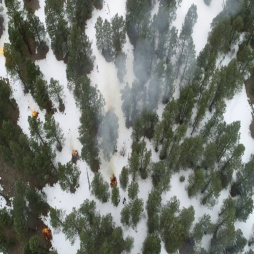

In [16]:
PIL.Image.open(str(lst_fire_img[1]))

In [17]:
image = PIL.Image.open(str(lst_fire_img[1]))

width, height = image.size

In [18]:
print(width, height)

254 254


In [19]:
image.format

'JPEG'

In [20]:
image.mode

'RGB'

Color Channel Histograms

In [21]:
def color_hist_visualization(image_path, figsize=(16, 4)):
    plt.figure(figsize=figsize)
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.axis("off")
    
    colors = ["red", "green", "blue"]
    for i in range(len(colors)):
        plt.subplot(1, 4, i + 2)
        plt.hist(
            img[:, :, i].reshape(-1),
            bins=25,
            alpha=0.5,
            color=colors[i],
            density=True
        )
        plt.xlim(0, 255)
        plt.xticks([])
        plt.yticks([])
    
    
    plt.show()

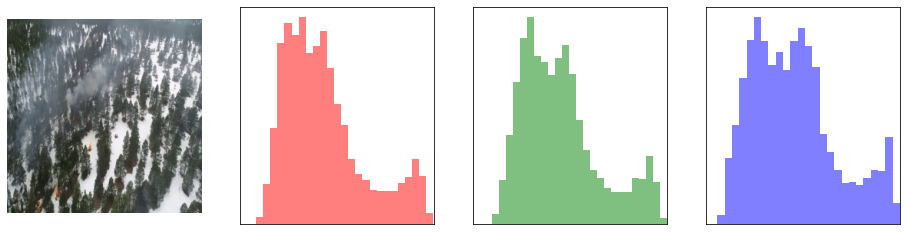

In [22]:
color_hist_visualization(str(lst_fire_img[2]))

Individual Channels Visualization

In [23]:
def channels_visualization(image_path, figsize=(16, 4)):
    plt.figure(figsize=figsize)
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.subplot(1, 4, 1)
    plt.imshow(np.mean(img, axis=2), cmap="gray")
    plt.axis('off')
    
    for i in range(3):
        plt.subplot(1, 4, i + 2)
        tmp_img = np.full_like(img, 0)
        tmp_img[:, :, i] = img[:, :, i]
        plt.imshow(tmp_img)
        plt.xlim(0, 255)
        plt.xticks([])
        plt.yticks([])
    
    
    plt.show()

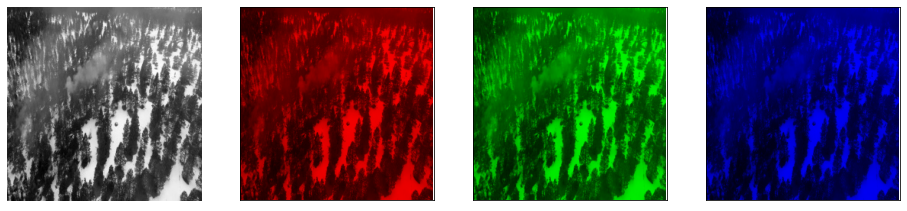

In [24]:
channels_visualization(str(lst_fire_img[2]))

Grayscale Visualization

In [25]:
def grayscale_visualization(image_path, figsize=(8, 4)):
    plt.figure(figsize=figsize)
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    tmp_img = np.full_like(img, 0)
    for i in range(3):
        tmp_img[:, :, i] = img.mean(axis=-1)
    plt.imshow(tmp_img)
    plt.axis('off')
    
    
    plt.show()

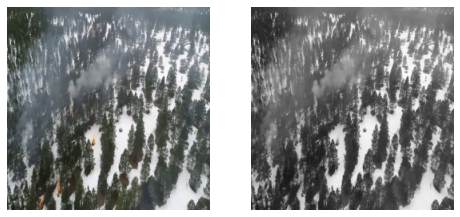

In [26]:
grayscale_visualization(str(lst_fire_img[2]))

In [27]:
pix_val = list(image.getdata())
pix_val_flat = [x for sets in pix_val for x in sets]
print("Pixel Values :",pix_val_flat)

Pixel Values : [94, 100, 100, 97, 103, 103, 171, 177, 175, 197, 204, 197, 115, 122, 114, 68, 74, 62, 47, 54, 38, 53, 61, 40, 44, 52, 29, 49, 57, 33, 46, 54, 30, 57, 62, 39, 65, 70, 50, 68, 72, 55, 112, 116, 101, 133, 137, 123, 122, 130, 117, 163, 171, 160, 215, 225, 217, 215, 224, 221, 217, 222, 225, 219, 224, 227, 188, 192, 193, 93, 93, 91, 72, 71, 66, 66, 62, 51, 57, 51, 39, 58, 50, 37, 63, 53, 43, 40, 30, 21, 52, 41, 35, 73, 62, 58, 76, 66, 56, 78, 69, 60, 88, 79, 70, 89, 82, 74, 92, 85, 77, 98, 94, 85, 157, 154, 145, 200, 199, 194, 222, 222, 222, 223, 224, 229, 229, 229, 239, 230, 233, 242, 217, 220, 225, 145, 151, 147, 115, 123, 110, 73, 82, 65, 69, 78, 59, 73, 80, 62, 74, 78, 61, 62, 66, 49, 67, 70, 53, 69, 73, 56, 69, 77, 56, 60, 69, 48, 69, 81, 57, 66, 78, 54, 66, 76, 52, 57, 65, 44, 71, 72, 56, 97, 91, 79, 79, 69, 60, 87, 74, 66, 82, 78, 75, 127, 126, 121, 184, 185, 177, 88, 91, 80, 96, 102, 88, 81, 90, 73, 112, 121, 104, 126, 134, 119, 88, 96, 83, 82, 88, 78, 70, 75, 68, 85, 

**Training data being split into train and validation set**

Changing the file names for our ease of use

In [28]:
path = '/content/Training/Fire'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, str(index).join(['Fire.','.jpg'])))

path = '/content/Training/No_Fire'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, str(index).join(['No_Fire.','.jpg'])))

In [29]:
# Make new base directory
original_dataset_dir_fire = "/content/Training/Fire"
original_dataset_dir_no_fire = "/content/Training/No_Fire"
base_dir = '/content/Fire_No_Fire'
os.mkdir(base_dir)

In [30]:
#creating the training and validation directory
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [31]:
#splitting the dataset into train and validation sets
#here we are considering 13000 images from both fire and no_fire classes to counter class imbalance
import shutil
fnames = ['Fire.{}.jpg'.format(i) for i in range(10400)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_fire, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['Fire.{}.jpg'.format(i) for i in range(10400, 13000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_fire, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['No_Fire.{}.jpg'.format(i) for i in range(10400)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_no_fire, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['No_Fire.{}.jpg'.format(i) for i in range(10400, 13000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_no_fire, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

In [32]:
#data being split into train and validation sets 

path, dirs, files = next(os.walk("/content/Fire_No_Fire/train"))
file_count = len(files)
print("No of train files ",file_count)

path, dirs, files = next(os.walk("/content/Fire_No_Fire/validation"))
file_count = len(files)
print("No of validation files ",file_count)

No of train files  20800
No of validation files  5200


In [33]:
#defining the image size and learning rate
IMG_SIZE = 254
LR = 1e-4

In [34]:
#function to get the label for fitting and evaluating the models
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'Fire': return 1
    elif word_label == 'No_Fire': return 0

In [35]:
#function to create the data split
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        #image=cv2.imread(path)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [36]:
#data being split into train and validation where features are stored in X and target is stored in y
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)

**Loading the test dataset**

In [37]:
# Unzip test data
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Test.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [38]:
#count of both the classes in the test file
path, dirs, files = next(os.walk("/content/Test/Fire"))
file_count = len(files)
print("No of files in Fire",file_count)
path, dirs, files = next(os.walk("/content/Test/No_Fire"))
file_count = len(files)
print("No of files in No_Fire",file_count)

No of files in Fire 5137
No of files in No_Fire 3480


Changing the file names for our ease of use

In [39]:
path = '/content/Test/Fire'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, str(index).join(['Fire.','.jpg'])))

path = '/content/Test/No_Fire'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, str(index).join(['No_Fire.','.jpg'])))

In [40]:
# Make new base directory
original_dataset_dir_fire = "/content/Test/Fire"
original_dataset_dir_no_fire = "/content/Test/No_Fire"
base_dir = '/content/Fire_No_Fire_test'
os.mkdir(base_dir)

In [41]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [42]:
#storing the test files in the test directory
fnames = ['Fire.{}.jpg'.format(i) for i in range(5137)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_fire, fname)
    dst = os.path.join(test_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['No_Fire.{}.jpg'.format(i) for i in range(3480)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_no_fire, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [43]:
#storing the features in test_X and the target i.e the classes in test_y
test_X, test_y = createDataSplitSet(test_dir)

**Model implementation**

Basic VGG16 with Adam optimizer

In [44]:
## VGG 16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

In [45]:
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [46]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
____________________________________________________________

In [47]:
last_layer = model.get_layer('fc2').output
out = Dense(1, activation='sigmoid', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0     

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [50]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
2080/2080 [==============================] - 1092s 524ms/step - loss: 0.1762 - acc: 0.9336 - val_loss: 0.0635 - val_acc: 0.9800
Epoch 2/10
2080/2080 [==============================] - 1180s 567ms/step - loss: 0.0683 - acc: 0.9768 - val_loss: 0.0385 - val_acc: 0.9875
Epoch 3/10
2080/2080 [==============================] - 1071s 515ms/step - loss: 0.0529 - acc: 0.9818 - val_loss: 0.0364 - val_acc: 0.9875
Epoch 4/10
2080/2080 [==============================] - 1206s 580ms/step - loss: 0.0404 - acc: 0.9858 - val_loss: 0.0627 - val_acc: 0.9740
Epoch 5/10
2080/2080 [==============================] - 1189s 572ms/step - loss: 0.0324 - acc: 0.9893 - val_loss: 0.0204 - val_acc: 0.9952
Epoch 6/10
2080/2080 [==============================] - 1080s 519ms/step - loss: 0.0328 - acc: 0.9884 - val_loss: 0.0188 - val_acc: 0.9942
Epoch 7/10
2080/2080 [==============================] - 1212s 583ms/step - loss: 0.0327 - acc: 0.9887 - val_loss: 0.0731 - val_acc: 0.9723
Epoch 8/10
2080/2080 [=====

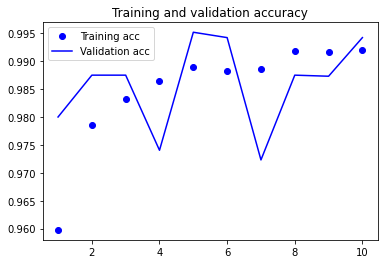

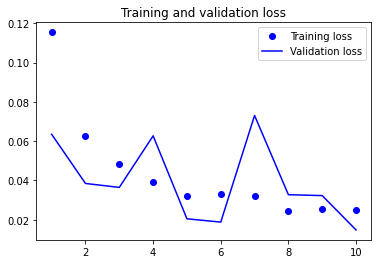

In [51]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [52]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9920673370361328
Val Accuracy:	 0.9942307472229004
Test Accuracy:	 0.7701056051990252
Precision:	 0.7929818046787969
Recall:		 0.8314191162156901
F1 Score:	 0.8117456998954671
AUC:		 0.7555084086825576


VGG16 model with Adam as optimizer and transfer learning feature tuning done

In [ ]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model.summary()

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(1, activation='sigmoid', name='output')(x)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False


model.summary()

In [58]:
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0   

In [59]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [60]:
history = model.fit(train_X, train_y,
                              batch_size=10,
                              epochs=10, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

Epoch 1/10
2080/2080 [==============================] - 1273s 612ms/step - loss: 0.0428 - acc: 0.9860 - val_loss: 0.0351 - val_acc: 0.9898
Epoch 2/10
2080/2080 [==============================] - 1177s 566ms/step - loss: 0.0095 - acc: 0.9976 - val_loss: 0.0047 - val_acc: 0.9988
Epoch 3/10
2080/2080 [==============================] - 1298s 624ms/step - loss: 0.0076 - acc: 0.9981 - val_loss: 0.0091 - val_acc: 0.9971
Epoch 4/10
2080/2080 [==============================] - 1322s 635ms/step - loss: 0.0072 - acc: 0.9977 - val_loss: 0.0022 - val_acc: 0.9994
Epoch 5/10
2080/2080 [==============================] - 1189s 572ms/step - loss: 0.0058 - acc: 0.9984 - val_loss: 0.0052 - val_acc: 0.9981
Epoch 6/10
2080/2080 [==============================] - 1190s 572ms/step - loss: 0.0046 - acc: 0.9987 - val_loss: 0.0027 - val_acc: 0.9990
Epoch 7/10
2080/2080 [==============================] - 1180s 567ms/step - loss: 0.0027 - acc: 0.9990 - val_loss: 0.0019 - val_acc: 0.9996
Epoch 8/10
2080/2080 [=====

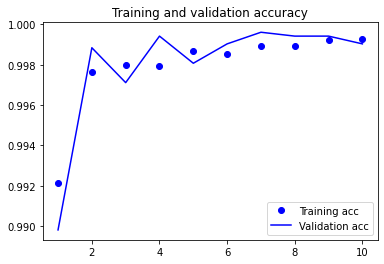

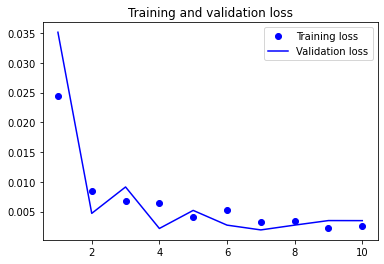

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [62]:
## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9992788434028625
Val Accuracy:	 0.9990384578704834
Test Accuracy:	 0.7492166647325055
Precision:	 0.8195876288659794
Recall:		 0.7428460190772824
F1 Score:	 0.7793321760441131
AUC:		 0.7507333543662275


Inception V3 model 

In [69]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
incept = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
incept.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 254, 254, 3) 0                                            
__________________________________________________________________________________________________
conv2d_382 (Conv2D)             (None, 126, 126, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_376 (BatchN (None, 126, 126, 32) 96          conv2d_382[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 126, 126, 32) 0           batch_normalization_376[0][0]    
_______________________________________________________________________________________

In [71]:
#Adding the last layer to the model
from tensorflow.keras import layers
last_layer = Flatten()(incept.output)
out = Dense(1, activation='sigmoid', name='output')(last_layer) 
incept = Model(img_input, out)

for layer in incept.layers[:-1]:
	layer.trainable = False

incept.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 254, 254, 3) 0                                            
__________________________________________________________________________________________________
conv2d_382 (Conv2D)             (None, 126, 126, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_376 (BatchN (None, 126, 126, 32) 96          conv2d_382[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 126, 126, 32) 0           batch_normalization_376[0][0]    
____________________________________________________________________________________________

In [72]:
incept.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [73]:
#Early stopping criterion
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='incpmodel.h5', save_best_only=True),
]

In [74]:
#Fitting the model
history = incept.fit(train_X, train_y,
                               batch_size=10,
                               epochs=5, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/5
2080/2080 [==============================] - 1262s 605ms/step - loss: 0.2133 - acc: 0.9750 - val_loss: 0.3208 - val_acc: 0.9746
Epoch 2/5
2080/2080 [==============================] - 2013s 968ms/step - loss: 0.0667 - acc: 0.9960 - val_loss: 0.1286 - val_acc: 0.9956
Epoch 3/5
2080/2080 [==============================] - 533s 256ms/step - loss: 0.1172 - acc: 0.9962 - val_loss: 0.0752 - val_acc: 0.9977
Epoch 4/5
2080/2080 [==============================] - 527s 253ms/step - loss: 0.0574 - acc: 0.9977 - val_loss: 0.0746 - val_acc: 0.9977
Epoch 5/5
2080/2080 [==============================] - 386s 186ms/step - loss: 0.0299 - acc: 0.9990 - val_loss: 0.0321 - val_acc: 0.9992


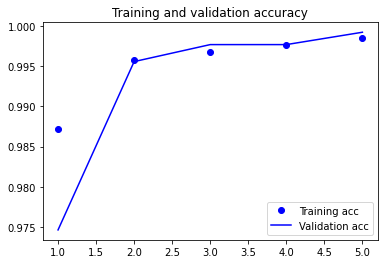

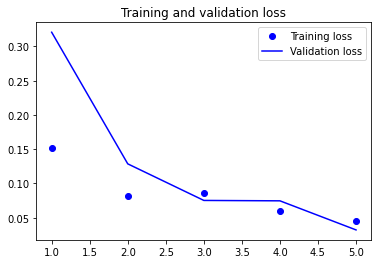

In [75]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [76]:
## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9984615445137024
Val Accuracy:	 0.9992307424545288
Test Accuracy:	 0.586515028432169
Precision:	 0.8145483613109512
Recall:		 0.3967296087210434
F1 Score:	 0.5335776934153684
AUC:		 0.6316981376938551


In [ ]:
#part of the code for transfer learning feature extraction and transfer learning feature tuning is taking from the data science and decision making lab